#Google Drive Connection To Load CSV From Drive

In [302]:
from google.colab import drive


drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Import Required Libraries

In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
sns.set_style('white')
%matplotlib inline
import plotly.express as px
import random
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords
import nltk 
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


#Load Dataset

In [304]:
df1 = pd.read_csv('/content/gdrive/MyDrive/Internship_Task/Eluvio_DS_Challenge.csv',sep=',')

#Data Preprocessing

In [305]:
df1 = df1.sort_values('date_created')

In [306]:
df1.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [307]:
#removing columns 'category' and 'down_votes' because values are constant or same for all records
df1 = df1.drop(['category','down_votes'],axis=1)

In [308]:
df1[df1['over_18']==True]

,time_created,date_created,up_votes,title,over_18,author
1885,1206381438,2008-03-24,189,Pics from the Tibetan protests - more graphic ...,True,pressed
6721,1211138718,2008-05-18,5,"MI5 linked to Max Mosley’s Nazi-style, sadomas...",True,alllie
8414,1212694925,2008-06-05,0,Tabloid Horrifies Germany: Poland s Yellow Pre...,True,stesch
12163,1216672016,2008-07-21,0,Love Parade Dortmund: Techno Festival Breaks R...,True,stesch
12699,1217381380,2008-07-30,5,IDF kills young Palestinian boy. Potentially N...,True,cup
...,...,...,...,...,...,...
503776,1477889966,2016-10-31,4,Latest Italian Earthquake Devastates Medieval ...,True,pixelinthe
508067,1479400229,2016-11-17,12,ISIS Release Video Showing Melbourne As A Poss...,True,halacska
508376,1479492875,2016-11-18,6,Jungle Justice : Public lynching of a street ...,True,avivi_
508176,1479434681,2016-11-18,0,Animal welfare activists have released footage...,True,NinjaDiscoJesus


In [309]:
#removing columns 'over_18', it contains boolean value 'True' & 'False' from that there are only 320 records which is true, which means distribution of data is not soo good to predict over_18
df1 = df1.drop(['over_18'],axis=1)

In [310]:
#dividing 'up_votes' values in 5 different category 
df1['up_votes'][(df1['up_votes'] >= 0) & (df1['up_votes'] <= 5)] = 1
df1['up_votes'][(df1['up_votes'] >= 6) & (df1['up_votes'] <= 20)] = 2
df1['up_votes'][(df1['up_votes'] >= 21) & (df1['up_votes'] <= 50)] = 3
df1['up_votes'][(df1['up_votes'] >= 51) & (df1['up_votes'] <= 200)] = 4
df1['up_votes'][(df1['up_votes'] >= 201)] = 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying t

In [311]:
#Number of records for each rating
df1.groupby('up_votes').count()

,time_created,date_created,title,author
up_votes,,,,
1,275854,275854,275854,275854
2,123484,123484,123484,123484
3,40863,40863,40863,40863
4,31855,31855,31855,31855
5,37180,37180,37180,37180


In [312]:
#creating new column 'text_length' which will contain the length of title
df1['text length']=df1['title'].apply(len)

In [313]:
#filtering data by date_created (between 2010-2016)
df = df1[47638:332574]

In [314]:
#Extracting 3500 records for each rating category to distribute data equally 
df1 = df[df['up_votes']==1][:3500]
df2 = df[df['up_votes']==2][:3500]
df3 = df[df['up_votes']==3][:3500]
df4 = df[df['up_votes']==4][:3500]
df5 = df[df['up_votes']==5][:3500]
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)


In [315]:
#shuffling data in dataset
df = df.sample(frac=1).reset_index(drop=True)

In [316]:
df.head()

,time_created,date_created,up_votes,title,author,text length
0,1268303053,2010-03-11,2,Vatican forced to defend itself over abuse cases,Maxcactus,48
1,1277896169,2010-06-30,2,"Well, that s alright then! Ireland Officially...",BakersDozen,72
2,1270376624,2010-04-04,1,White supremacists to avenge leader s murder...,CliffDropOver,72
3,1306863974,2011-05-31,5,Pak Journalist Who Wrote Of Terrorist Link To ...,Kranky_Old_Dude,258
4,1262973596,2010-01-08,2,Burma to execute two over secret tunnels leak,igeldard,45


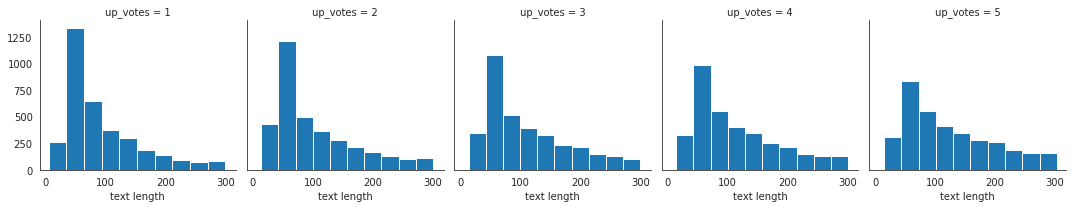

In [317]:
#each graph shows that title length between 50-59 has highest number of votes
g = sns.FacetGrid(df,col='up_votes')
g.map(plt.hist,'text length')

In [318]:
plt.figure(figsize=(12,12))
px.histogram(x=df['text length'],color=df['up_votes'],nbins=40,opacity=0.7)

<Figure size 864x864 with 0 Axes>

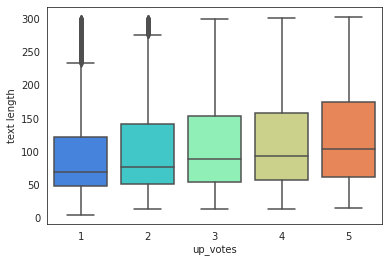

In [319]:
# the below boxplot shows that as text length increase for news 'title', rating also increase, which means text length play important role to predict rating
sns.boxplot(x='up_votes',y='text length',data=df,palette='rainbow')

In [320]:
# the below table shows that as text length increase for news 'title', rating also increase, which means text length play important role to predict rating
df.groupby('up_votes').mean()

,time_created,text length
up_votes,,
1,1.267074e+09,92.786000
2,1.273097e+09,102.927714
3,1.287157e+09,110.546286
4,1.294113e+09,114.798857
5,1.305043e+09,123.980857


#NLP text preprocessing

In [321]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [322]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['title'])

# Print total number of vocab words in column 'title'
print(len(bow_transformer.vocabulary_))

30067


In [323]:
text_bow = bow_transformer.transform(df['title'])

In [324]:
tfidf_transformer = TfidfTransformer().fit(text_bow)

In [325]:
text_tfidf = tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(17500, 30067)


#Buidling and Running Model

In [326]:
stock_prediction_model = MultinomialNB().fit(text_tfidf, df['up_votes'])

In [327]:
all_predictions = stock_prediction_model.predict(text_tfidf)
print(all_predictions)

[4 2 1 ... 5 5 2]


#Evalution

In [336]:
print(classification_report(df['up_votes'], all_predictions))


              precision    recall  f1-score   support

           1       0.85      0.77      0.81      3500
           2       0.77      0.81      0.79      3500
           3       0.81      0.78      0.79      3500
           4       0.79      0.80      0.79      3500
           5       0.76      0.83      0.79      3500

    accuracy                           0.80     17500
   macro avg       0.80      0.80      0.80     17500
weighted avg       0.80      0.80      0.80     17500



#Deployment

In [329]:
#generate random number between 0 to 17500 (which is total number of data).
i = random.randint(0,17500)
print('random digit:',i)
print("------------------------------------------------------------------------")

#take random number of title (text) for predicting the rating
rand = df['title'].iloc[i]

#preprocess the title and put in our created model to predict rating
bow4 = bow_transformer.transform([rand])
print(bow4)
print(bow4.shape)
print("------------------------------------------------------------------------")
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

#result of prediction
print("------------------------------------------------------------------------")
from termcolor import colored
pre1 = stock_prediction_model.predict(tfidf4)[0]
print("Predicted Rating For News: ",pre1)

#check the actual value of rating for that predicted title
print("------------------------------------------------------------------------")
pre3 = df['up_votes'].iloc[i]
print("Actual Rating For News: ",pre3)

random digit: 1830
------------------------------------------------------------------------
  (0, 12125)	1
  (0, 12925)	1
  (0, 17118)	1
(1, 30067)
------------------------------------------------------------------------
  (0, 17118)	0.5386330881647294
  (0, 12925)	0.7665062735441711
  (0, 12125)	0.3497749690180177
------------------------------------------------------------------------
Predicted Rating For News:  4
------------------------------------------------------------------------
Actual Rating For News:  4


In [331]:

print("----------Enter Random String to Predict Rating For News Title----------")
rand = input()
print("------------------------------------------------------------------------")


#preprocess the string and put in our created model to predict rating
bow4 = bow_transformer.transform([rand])
print(bow4)
print(bow4.shape)
print("------------------------------------------------------------------------")
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

#result of prediction
print("------------------------------------------------------------------------")
from termcolor import colored
pre1 = stock_prediction_model.predict(tfidf4)[0]
print("Predicted Rating For News: ",pre1)


----------Enter Random String to Predict Rating For News Title----------
# the below table shows that as text length increase for news 'title', rating also increase, which means text length play important role to predict rating
------------------------------------------------------------------------
  (0, 13572)	1
  (0, 20348)	1
  (0, 20437)	2
  (0, 21339)	2
  (0, 21905)	1
  (0, 22609)	1
  (0, 23736)	1
  (0, 24041)	1
  (0, 24707)	2
  (0, 25576)	1
  (0, 26322)	1
  (0, 27588)	1
  (0, 27827)	2
  (0, 28006)	1
(1, 30067)
------------------------------------------------------------------------
  (0, 28006)	0.222449715990088
  (0, 27827)	0.3852389649458696
  (0, 27588)	0.2186304015009626
  (0, 26322)	0.15349791484448413
  (0, 25576)	0.16847330447532374
  (0, 24707)	0.4195864887164514
  (0, 24041)	0.2186304015009626
  (0, 23736)	0.19025802969766498
  (0, 22609)	0.14405519188946148
  (0, 21905)	0.17737733480604045
  (0, 21339)	0.444899431980176
  (0, 20437)	0.36682687521257973
  (0, 20348)	0.18